# Importing Libraries

In [168]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import pickle
import warnings
warnings.filterwarnings('ignore')

#other libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc,classification_report

#machine learning algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Loading the Dataset

In [169]:
heartdf = pd.read_csv("heart.csv")

In [170]:
heartdf.head()

,age,sex,cp,bp,chol,fbs,ecg,mhr,exang,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [171]:
heartdf.tail()

,age,sex,cp,bp,chol,fbs,ecg,mhr,exang,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [172]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   bp       303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   ecg      303 non-null    int64  
 7   mhr      303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  caa      303 non-null    int64  
 12  thall    303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [173]:
heartdf.shape

(303, 14)

# Feature Engineering

In [174]:
# 1)We'll check is there any null values and '0' indicate no null values 
heartdf.isnull().sum()


age        0
sex        0
cp         0
bp         0
chol       0
fbs        0
ecg        0
mhr        0
exang      0
oldpeak    0
slp        0
caa        0
thall      0
output     0
dtype: int64

In [175]:
#Graph of output distribution
print(heartdf['output'].value_counts())
heartdf.output.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350, 
)

output
1    165
0    138
Name: count, dtype: int64


:Bars   [output]   (count)

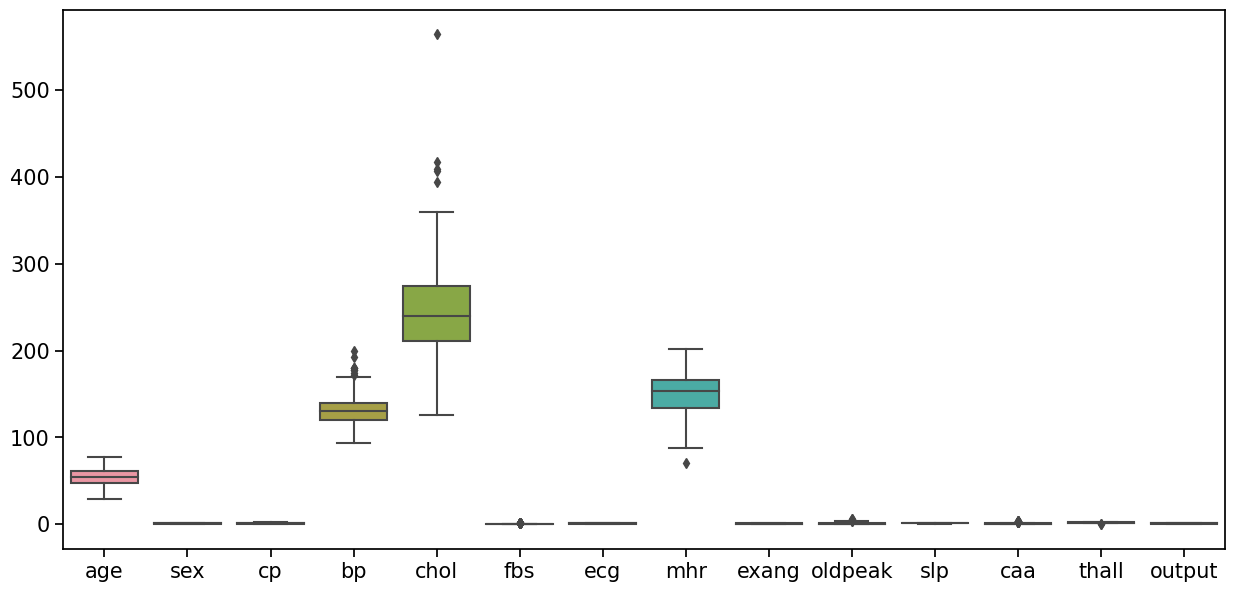

In [176]:
#2)after checking null values we'll check outliers in the dataset
plt.figure(figsize=(15,7))
ax=sns.boxplot(data=heartdf)
ax.tick_params(axis='both', labelsize=15) 

In [177]:
# 3)Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(heartdf))
print(z)

          age       sex        cp        bp      chol       fbs       ecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

          mhr     exang   oldpeak       slp       caa     thall    output  

In [178]:
threshold=3
# here we'll print z whose greater than third deviation
print(np.where(z > 3)) #The first array contains the list of row numbers and second array contains respective col

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [179]:
Q1=heartdf.quantile(0.25)
Q3=heartdf.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age        13.5
sex         1.0
cp          2.0
bp         20.0
chol       63.5
fbs         0.0
ecg         1.0
mhr        32.5
exang       1.0
oldpeak     1.6
slp         1.0
caa         1.0
thall       1.0
output      1.0
dtype: float64


In [180]:
#Removing Outliers Based on Z-Score
heartdf = heartdf[(z < 3).all(axis=1)]
heartdf.shape 

(287, 14)

In [181]:
#Removing Outliers Based on IQR
heartdf=heartdf[~((heartdf < (Q1 - 1.5 * IQR)) | (heartdf > (Q3 + 1.5 * IQR))).any(axis=1)]
heartdf.shape 

(228, 14)

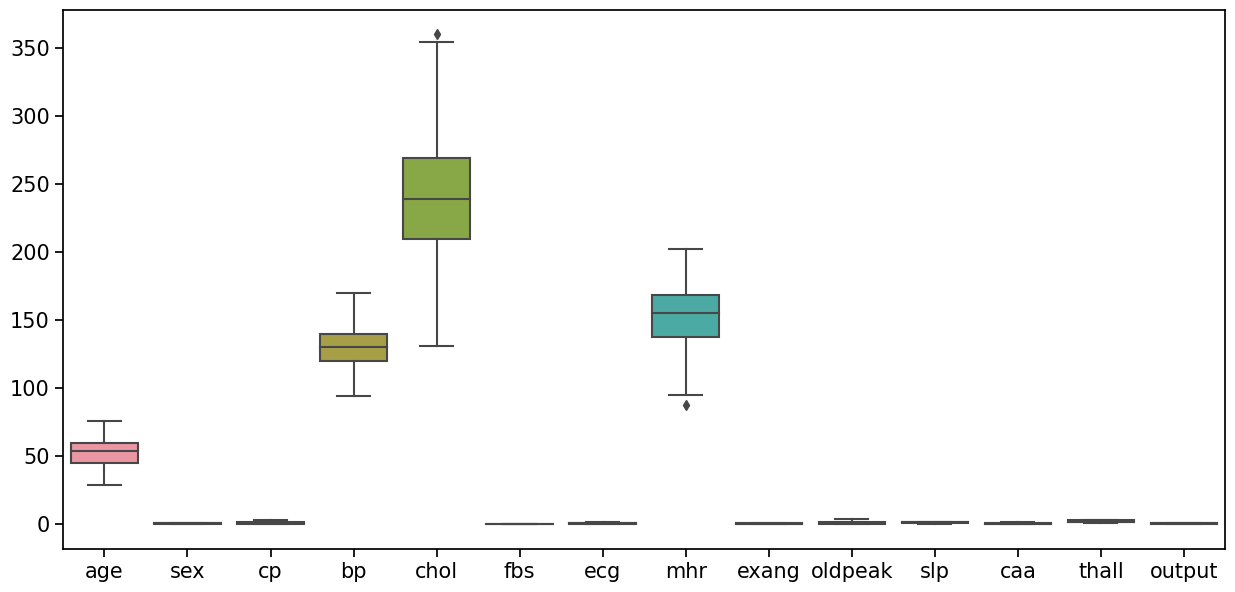

In [182]:
#To check whether the outlier's are removed
plt.figure(figsize=(15,7))
ax= sns.boxplot(data=heartdf)
ax.tick_params(axis='both', labelsize=15) 

# Feature Selection

<Axes: >

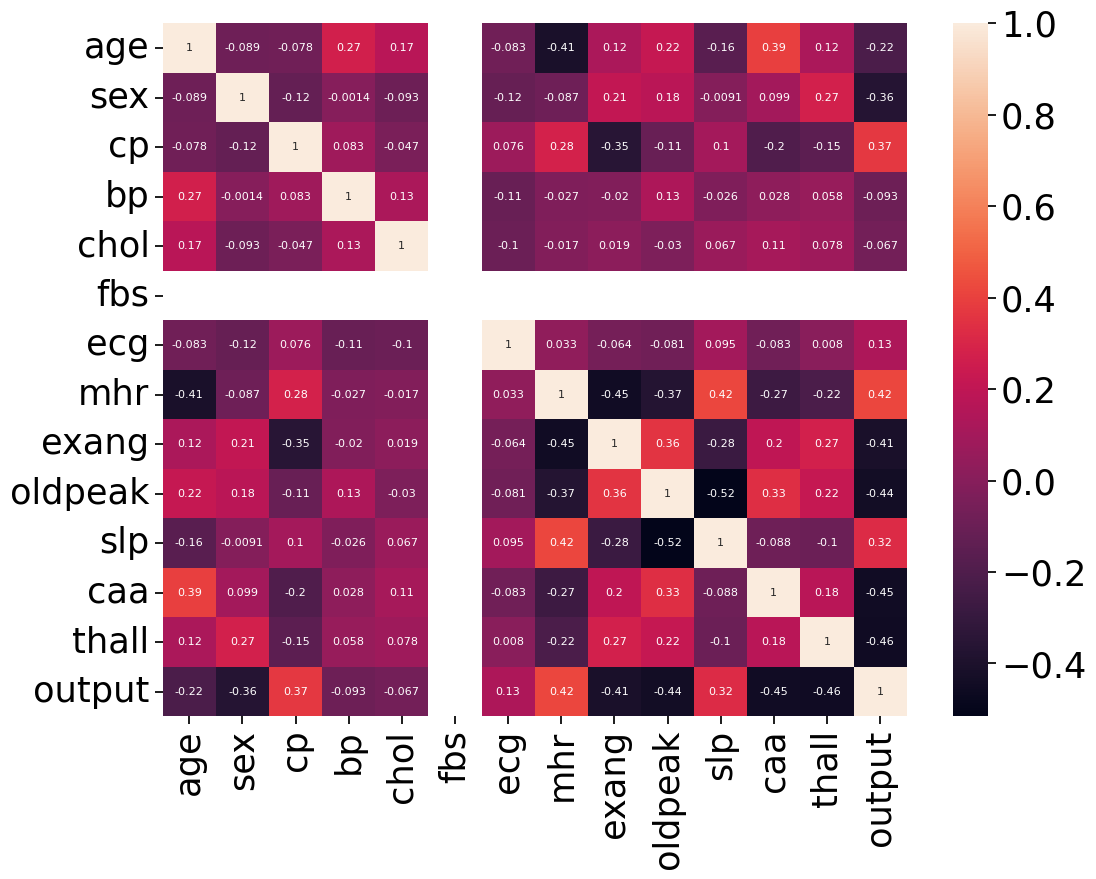

In [183]:
cor = heartdf.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True ,annot_kws={"size": 8})

In [184]:
rel = cor['output'].sort_values(ascending = False)
rel

output     1.000000
mhr        0.417870
cp         0.371115
slp        0.323569
ecg        0.131641
chol      -0.067321
bp        -0.092560
age       -0.215120
sex       -0.363483
exang     -0.414407
oldpeak   -0.439194
caa       -0.447167
thall     -0.455780
fbs             NaN
Name: output, dtype: float64

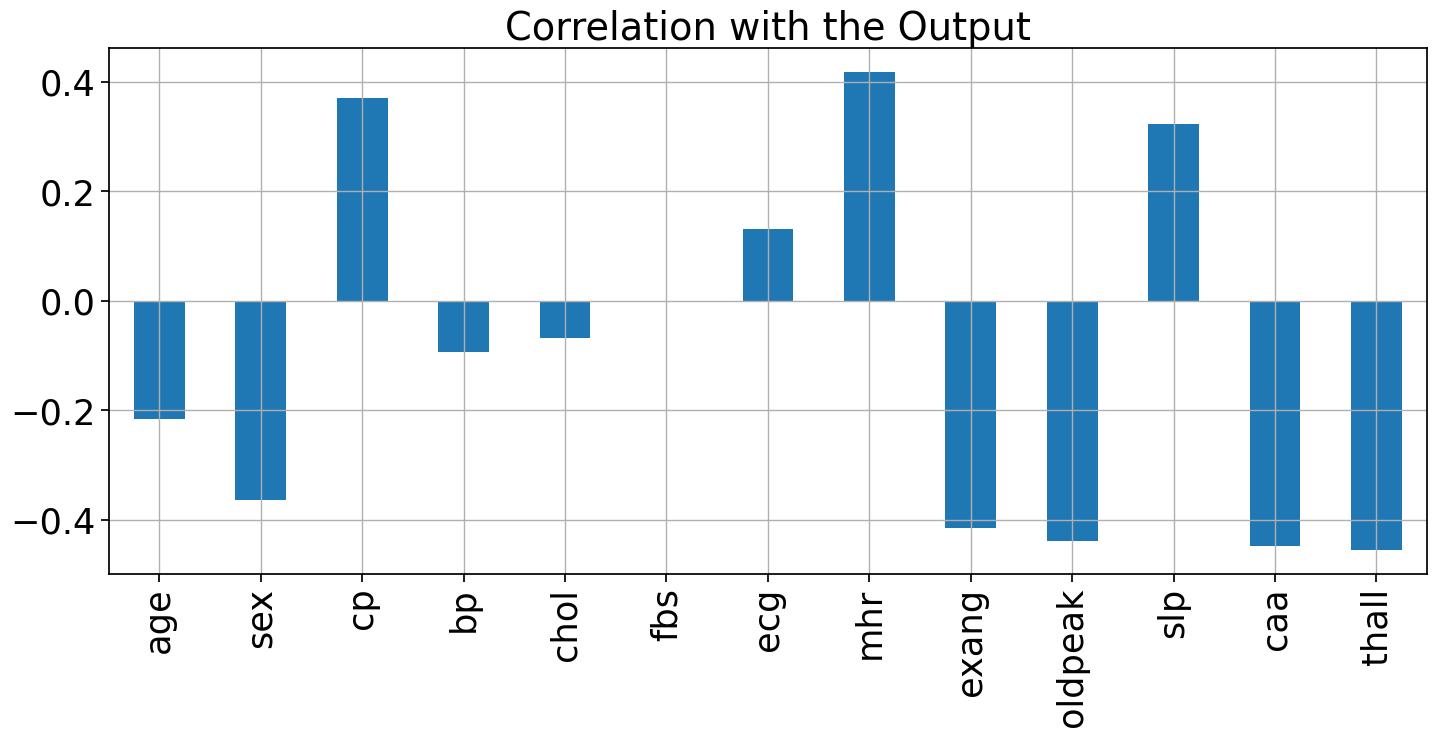

In [185]:
sns.set_context('notebook',font_scale = 2.3)
heartdf.drop('output', axis=1).corrwith(heartdf.output).plot(kind='bar', grid=True, figsize=(15, 8), 
                                                        title="Correlation with the Output")
plt.tight_layout()

In [186]:
heartdf=heartdf.drop(['fbs'],axis=1)
heartdf.describe()

,age,sex,cp,bp,chol,ecg,mhr,exang,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


# Feature Scaling

In [187]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(heartdf,columns=['sex','cp','ecg','exang','slp','caa','thall']) #creating my dummy variable
columns_to_scale= ['age','bp','chol','mhr','oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [188]:
dataset.head()

,age,bp,chol,mhr,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,exang_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,thall_1,thall_2,thall_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,False,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,True,False,True,False,...,True,False,False,True,True,False,False,False,True,False
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False


In [189]:
dataset.tail()

,age,bp,chol,mhr,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,exang_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,thall_1,thall_2,thall_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,True,False,True,False,...,True,False,True,False,True,False,False,False,False,True
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1 to 302
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      228 non-null    float64
 1   bp       228 non-null    float64
 2   chol     228 non-null    float64
 3   mhr      228 non-null    float64
 4   oldpeak  228 non-null    float64
 5   output   228 non-null    int64  
 6   sex_0    228 non-null    bool   
 7   sex_1    228 non-null    bool   
 8   cp_0     228 non-null    bool   
 9   cp_1     228 non-null    bool   
 10  cp_2     228 non-null    bool   
 11  cp_3     228 non-null    bool   
 12  ecg_0    228 non-null    bool   
 13  ecg_1    228 non-null    bool   
 14  ecg_2    228 non-null    bool   
 15  exang_0  228 non-null    bool   
 16  exang_1  228 non-null    bool   
 17  slp_0    228 non-null    bool   
 18  slp_1    228 non-null    bool   
 19  slp_2    228 non-null    bool   
 20  caa_0    228 non-null    bool   
 21  caa_1    228 non-null

In [191]:
dataset.describe()

,age,bp,chol,mhr,oldpeak,output
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000
mean,-2.337312e-16,-7.401487e-16,-1.012835e-16,-6.232831e-17,6.232831e-17,0.578947
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000


# Model Selection

In [192]:
y= dataset['output']
x= dataset.drop(['output'],axis=1)


In [193]:

x.head()

,age,bp,chol,mhr,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,exang_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,thall_1,thall_2,thall_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,True,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,False,True,False,True,False,...,False,False,False,True,True,False,False,False,True,False
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,True,False,True,False,False,...,True,False,False,True,True,False,False,False,True,False
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,False,True,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [194]:
#Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [195]:
x_test.head()

,age,bp,chol,mhr,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,exang_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,thall_1,thall_2,thall_3
174,0.723949,0.086772,-0.822309,-0.849694,1.407297,False,True,True,False,False,...,True,False,True,False,False,False,True,False,False,True
123,0.072395,-1.349687,0.556767,0.709772,-0.915698,True,False,False,False,True,...,False,False,False,True,True,False,False,False,True,False
45,-0.144790,-0.566164,1.868020,0.932553,-0.722115,False,True,False,True,False,...,False,False,False,True,True,False,False,False,True,False
65,-1.990859,0.609120,-1.342289,1.378114,0.439382,True,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
268,0.072395,-0.435577,0.986315,-1.562593,2.181629,False,True,True,False,False,...,True,False,True,False,False,False,True,False,True,False


### Logistic regression

In [196]:
#Logistic regression
lcla = LogisticRegression()
lcla.fit(x_train, y_train)
predict = lcla.predict(x_test)
acu=accuracy_score(predict, y_test)
print("Accuracy using Logistic Regression is: {} %".format(acu*100))

Accuracy using Logistic Regression is: 86.95652173913044 %


In [197]:
score=cross_val_score(lcla,x_train,y_train,cv=10)
score.mean()

0.795906432748538

### Decision Tree Classifier

In [198]:
# Decision Tree Classifier
maxi=0
for i in range(5,10):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    predict = dt_classifier.predict(x_test)
    acu = accuracy_score(predict, y_test)
    if acu>maxi:
        maxi=acu
print (acu)

0.782608695652174


In [199]:
score=cross_val_score(dt_classifier,x_train,y_train,cv=10)
score.mean()

0.7464912280701754

### Random Forest Classifier

In [200]:
#Random forest classifier
maxi=0
for i in range (20,30):
    rcla = RandomForestClassifier(n_estimators = 30)
    rcla.fit(x_train, y_train)
    predict = rcla.predict(x_test)
    acu = accuracy_score(predict, y_test)
    if acu>maxi:
            maxi=acu
print("Accuracy using Random Forest Classifier is: {} %".format(maxi*100))

Accuracy using Random Forest Classifier is: 93.47826086956522 %


In [201]:
#Ada Boosting With random forest
maxi=0
for i in range (5,15):
    for j in range(5,15):
        ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=i), n_estimators=j)
        ada_clf.fit(x_train, y_train)
        y_pred_adb = ada_clf.predict(x_test)
        acu = accuracy_score(y_test, y_pred_adb)
        if maxi<acu:
            maxi = acu
print("Accuracy after Ada Boosting with Random Forest is: {} %".format(maxi*100))  


Accuracy after Ada Boosting with Random Forest is: 97.82608695652173 %


In [202]:
score=cross_val_score(ada_clf,x_train,y_train,cv=10)
score.mean()

0.8345029239766083

### Support Vector Machine

In [203]:
#Support Vector Machine
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
maxi=0
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    predict=svc_classifier.predict(x_test)
    acu=accuracy_score(predict, y_test)
    if acu>maxi:
        maxi=acu
print("Accuracy using Support Vector Machine is: {} %".format(maxi*100))

Accuracy using Support Vector Machine is: 89.13043478260869 %


### KNN Classifier

In [204]:
#K - Nearest Neighbor classifier
maxi=0
for i in range (4,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(x_train,y_train)
    y_pred_knn=knn_classifier.predict(x_test.values)
    acu = accuracy_score(y_test,y_pred_knn)
    if acu>maxi:
        maxi=acu
print("Accuracy using KNN Classifier is: {} %".format(maxi*100))

Accuracy using KNN Classifier is: 93.47826086956522 %


In [205]:
#hyper parameter tunning
maxi=0
data=[]
best_predict=0
for i in range(4,20):
    knn_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                                      metric_params=None, n_jobs=1,n_neighbors=i,p=1,weights='uniform')
    knn_classifier.fit(x_train,y_train)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    y_pred_knn=knn_classifier.predict(x_test.values)
    acu = accuracy_score(y_test,y_pred_knn)
    data.append([acu])
    if acu>maxi:
        maxi=acu
        best_predict = y_pred_knn
print("Accuracy after hyper parameter tuning on KNN is: {} %".format(maxi*100))
#hence accuracy increases after Hyper parameter tunning

Accuracy after hyper parameter tuning on KNN is: 97.82608695652173 %


Text(0.5, 1.0, 'Accuracy variation with Neighbors')

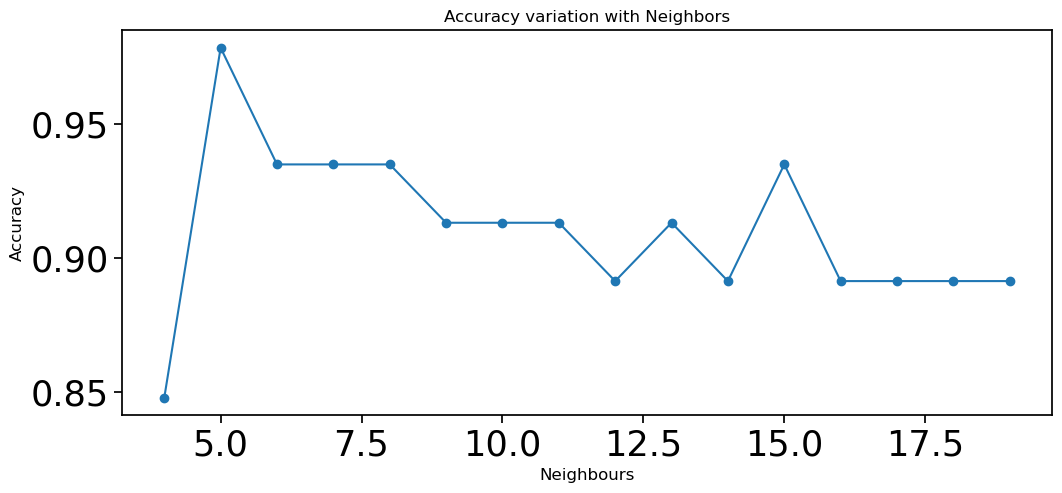

In [206]:
plt.figure(figsize = (12,5))
plt.plot(range (4, 20),data, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)

AUC value is 0.9838709677419355


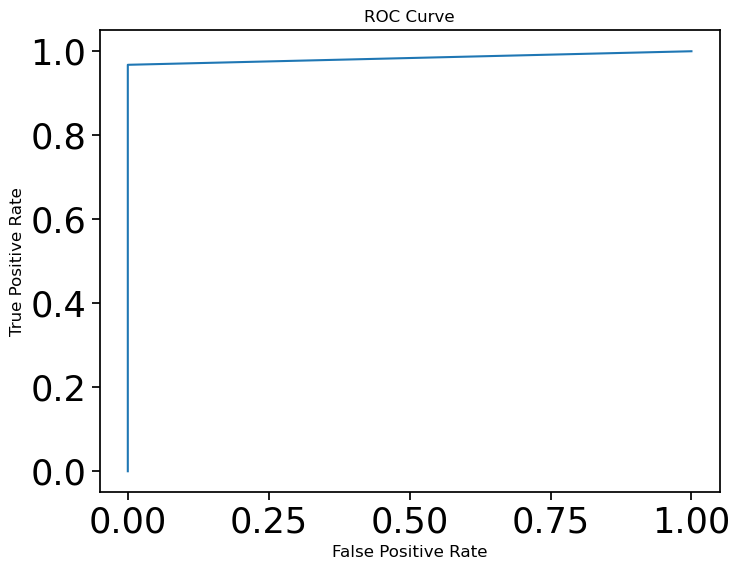

In [207]:
fpr, tpr, threshould = roc_curve(best_predict, y_test)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

In [208]:

pickle.dump(knn_classifier,open('heartmodeltest.pkl','wb'))